In [1]:
import maintsim
import random
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

%xmode verbose

Exception reporting mode: Verbose


In [2]:
sys = maintsim.System(process_times=[3, 5, 4],
                      buffer_sizes=10,
                      failure_mode='degradation',
                      failure_params=[0.25]*3,
                      maintenance_policy='CBM',
                      maintenance_params={'CBM threshold':[10,10,10]},
                      repair_params={'CM':stats.randint(10,20),
                                     'CBM':stats.randint(15,25)},
                      # repair_params={'CM':{'uniform':{'low':10,'high':20)},
                      #                'PM':{'uniform':{'low':5, 'high':10}}},
                      maintenance_capacity=3, debug=False)

In [3]:
sys.simulate(sim_time=100)

M2 stopped production at t=40
degradation interrupted at t=40


AttributeError: 'Machine' object has no attribute 'maintenance_request'

In [14]:
sys.machine_data[['M{} health'.format(m) for m in range(3)]].ffill()[40:60]

,M0 health,M1 health,M2 health
40,9.0,10.0,10.0
41,9.0,10.0,10.0
42,9.0,10.0,10.0
43,9.0,10.0,10.0
44,10.0,10.0,10.0
45,10.0,10.0,10.0
46,10.0,10.0,10.0
47,10.0,10.0,10.0
48,10.0,10.0,0.0
49,10.0,0.0,0.0


In [10]:
sys.env.now

22

In [4]:
sys = maintsim.System(process_times=[3, 4],
                      buffer_sizes=10,
                      failure_mode='degradation',
                      failure_params=[0.25]*2,
                      maintenance_policy='CBM',
                      maintenance_params={'CBM threshold':[7,6]},
                      repair_params={'CM':stats.randint(10,20),
                                     'CBM':stats.randint(20,25)},
                      # repair_params={'CM':{'uniform':{'low':10,'high':20)},
                      #                'PM':{'uniform':{'low':5, 'high':10}}},
                      maintenance_capacity=1,
                      debug=True)

In [8]:
sys.simulate(sim_time=100)

0 [] [] []
1 [] [] []
2 [] [] []
3 [] [] []
4 [] [] []
5 [] [] []
6 [] [] []
7 [] [] []
8 [] [] []
9 [] [] []
10 [] [] []
11 [] [] []
12 [] [] []
13 [] [] []
14 [] [] []
15 [] [] []
16 [] [] []
17 [] [] []
18 [] [] []
19 [] [] []
20 [] [] []
21 [] [] []
22 [] [] []
23 [] [] []
24 [] [] []
25 [] [] []
26 [] [] []
27 [] [] []
M1 CBM requested at t=28
M1 requesting maintenance at t=28
28 [] [<PriorityRequest() object at 0x1a1bb5b128>] []
M1 stopped production at t=28
M1 starting matinenance at t=28
degradation interrupted at t=28
29 [] [<PriorityRequest() object at 0x1a1bb5b128>] []
30 [] [<PriorityRequest() object at 0x1a1bb5b128>] []
31 [] [<PriorityRequest() object at 0x1a1bb5b128>] []
32 [] [<PriorityRequest() object at 0x1a1bb5b128>] []
33 [] [<PriorityRequest() object at 0x1a1bb5b128>] []
34 [] [<PriorityRequest() object at 0x1a1bb5b128>] []
35 [] [<PriorityRequest() object at 0x1a1bb5b128>] []
36 [] [<PriorityRequest() object at 0x1a1bb5b128>] []
37 [] [<PriorityRequest() object at

In [6]:
sys.env.step()
print(sys.repairman.users, sys.repairman.put_queue)

[<PriorityRequest() object at 0x1a235f27f0>] [<PriorityRequest() object at 0x1a23606198>, <PriorityRequest() object at 0x1a23606c50>, <PriorityRequest() object at 0x1a2360e7b8>]


In [7]:
sys.maintenance_data

,time,machine,type,activity,duration
0,27,0,CBM,failure,NA
1,49,0,CBM,repair,22
2,49,1,CM,failure,NA
3,60,1,CM,repair,11
4,85,0,CBM,failure,36


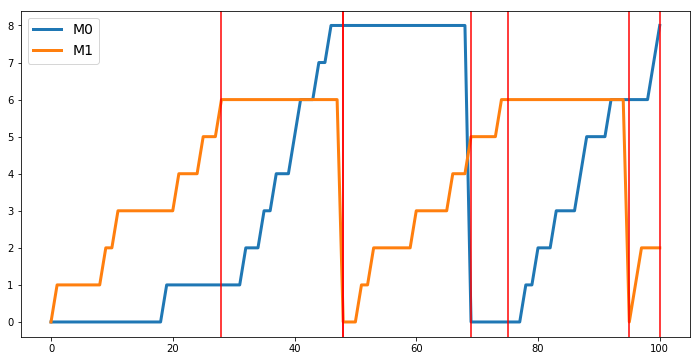

In [9]:
plt.figure(figsize=(12,6))
plt.plot(sys.machine_data['M0 health'], label='M0', lw=3)
plt.plot(sys.machine_data['M1 health'], label='M1', lw=3)
for t in sys.maintenance_data['time']: plt.axvline(x=t, color='red')
plt.legend(fontsize=14)
plt.show()

In [55]:
sys.machines[1].failed

True

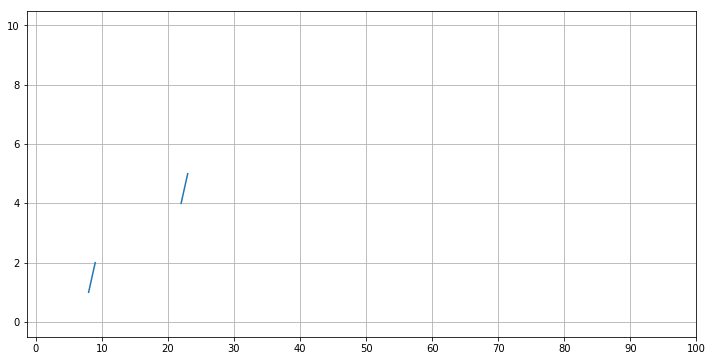

In [11]:
plt.figure(figsize=(12,6))
plt.plot(sys.machine_data[['M0 health', 'M1 health']])
plt.xticks(np.arange(0,101,10))
colors = ['red', 'orange']
for t in sys.maintenance_data['time'].values:
    #plt.axvline(x=t, c='red')
    pass
plt.grid()
plt.show()

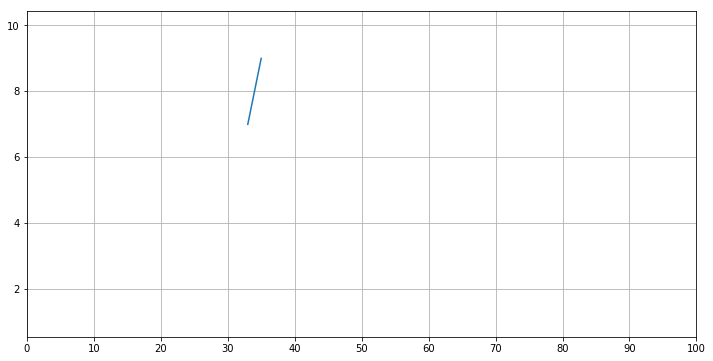

In [5]:
plt.figure(figsize=(12,6))
plt.plot(sys.machine_data[['M{} health'.format(m) for m in range(1)]])
plt.xticks(np.arange(0,101,10))
plt.grid()
plt.show()

In [38]:
sys.machine_data[['M{} health'.format(m) for m in range(3)]]

,M0 health,M1 health,M2 health
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,1.0,0.0
3,1.0,2.0,0.0
4,1.0,2.0,0.0
5,2.0,2.0,0.0
6,2.0,2.0,0.0
7,2.0,2.0,0.0
8,2.0,2.0,0.0
9,2.0,2.0,0.0
